In [1]:
%matplotlib notebook
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体   
plt.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# 伯努利分布（Bernoulli Distribution）

In [2]:
fs=16

<IPython.core.display.Javascript object>


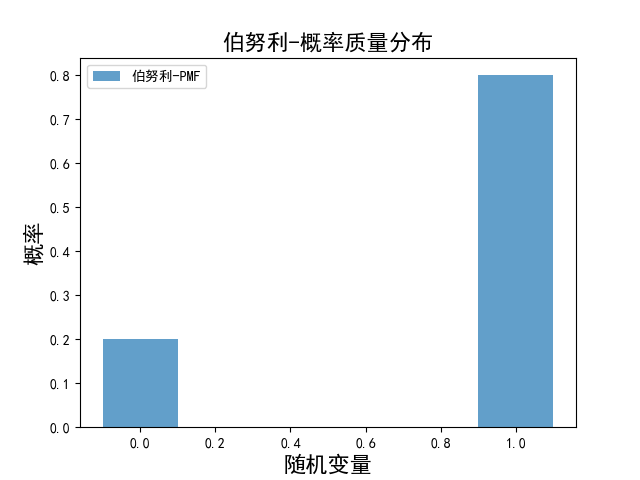

<BarContainer object of 2 artists>

Text(0.5,1,'伯努利-概率质量分布')

Text(0.5,0,'随机变量')

Text(0,0.5,'概率')

In [3]:
fig,ax=plt.subplots(1,1)
p=.8
x=[0,1]
plt.bar(x,stats.bernoulli.pmf(x,p),label='伯努利-PMF',alpha=.7,width=.2)
plt.title('伯努利-概率质量分布',fontsize=fs)
plt.xlabel('随机变量',fontsize=fs)
plt.ylabel('概率',fontsize=fs)
plt.legend()

# 二项分布

<IPython.core.display.Javascript object>


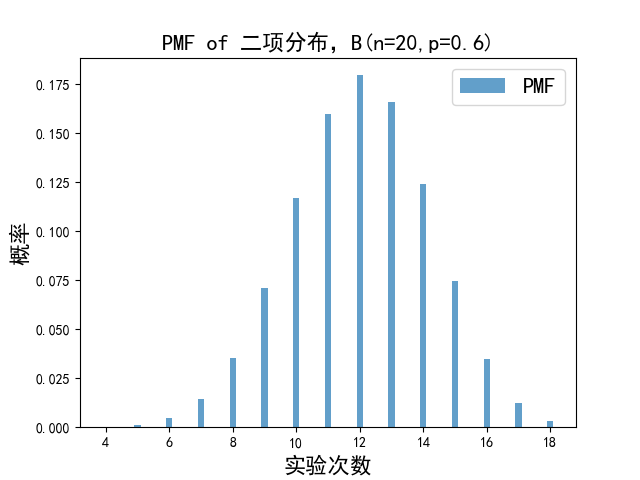

<BarContainer object of 15 artists>

Text(0.5,1,'PMF of 二项分布，B(n=20,p=0.6)')

Text(0.5,0,'实验次数')

Text(0,0.5,'概率')

In [4]:
fig,ax=plt.subplots(1,1)
n,p=20,.6
binom=stats.binom(n,p)
x=np.arange(binom.ppf(0.0001),binom.ppf(.9999))
plt.bar(x,binom.pmf(x),label='PMF',alpha=.7,width=.2)
plt.title('PMF of 二项分布，B(n={},p={})'.format(n,p),fontsize=fs)
plt.xlabel('实验次数',fontsize=fs)
plt.ylabel('概率',fontsize=fs)
plt.legend(fontsize=fs)

# 泊松分布

<IPython.core.display.Javascript object>


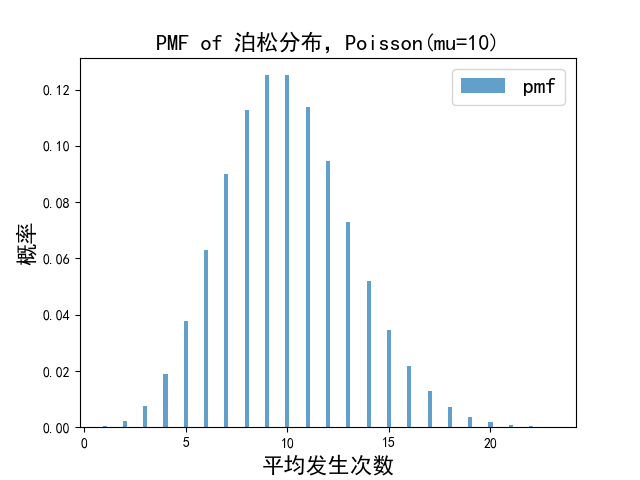

<BarContainer object of 23 artists>

Text(0.5,1,'PMF of 泊松分布，Poisson(mu=10)')

Text(0.5,0,'平均发生次数')

Text(0,0.5,'概率')

In [5]:
fig, ax = plt.subplots(1, 1)
mu=10
poisson = stats.poisson(mu)
x=np.arange(poisson.ppf(0.0001),poisson.ppf(.9999))
plt.bar(x,poisson.pmf(x),label='pmf',alpha=0.7,width=.2)
plt.title('PMF of 泊松分布，Poisson(mu={})'.format(mu),fontsize=fs)
plt.xlabel('平均发生次数',fontsize=fs)
plt.ylabel('概率',fontsize=fs)
plt.legend(fontsize=fs)
plt.subplots_adjust(wspace=0,hspace=.7)

# 二项分布和其他分布的关系

<IPython.core.display.Javascript object>


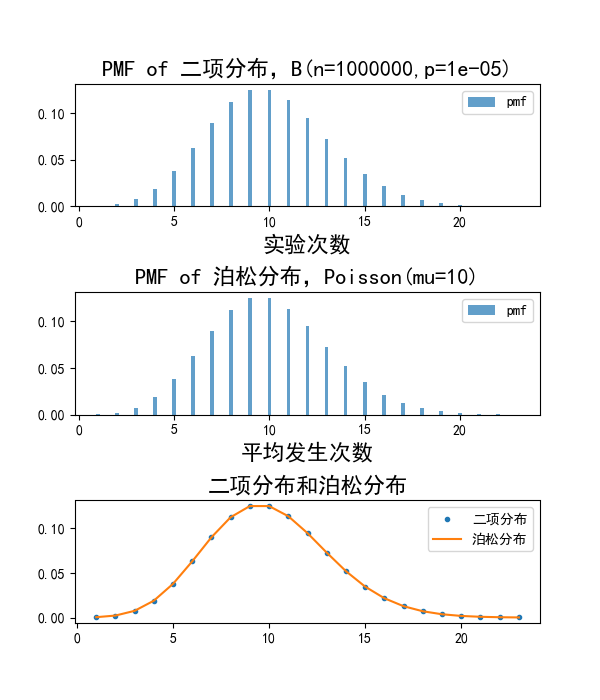

<BarContainer object of 23 artists>

Text(0.5,1,'PMF of 二项分布，B(n=1000000,p=1e-05)')

Text(0.5,0,'实验次数')

<BarContainer object of 23 artists>

Text(0.5,1,'PMF of 泊松分布，Poisson(mu=10)')

Text(0.5,0,'平均发生次数')

Text(0.5,1,'二项分布和泊松分布')

In [6]:
fig, ax = plt.subplots(3, 1,sharex=True,sharey=True,figsize=(6,7))
n,p=1000000,.00001
binom=stats.binom(n,p)
bx=np.arange(binom.ppf(0.0001),binom.ppf(.9999))
plt.subplot(3, 1, 1)
plt.bar(bx,binom.pmf(x),label='pmf',alpha=0.7,width=.2)
plt.title('PMF of 二项分布，B(n={},p={})'.format(n,p),fontsize=fs)
plt.xlabel('实验次数',fontsize=fs)
# plt.ylabel('概率',fontsize=fs)
plt.legend()

mu=10
poisson = stats.poisson(mu)
px=np.arange(poisson.ppf(0.0001),poisson.ppf(.9999))
plt.subplot(3, 1, 2)
plt.bar(px,poisson.pmf(x),label='pmf',alpha=0.7,width=.2)
plt.title('PMF of 泊松分布，Poisson(mu={})'.format(mu),fontsize=fs)
plt.xlabel('平均发生次数',fontsize=fs)
# plt.ylabel('概率',fontsize=fs)
plt.legend()
plt.subplots_adjust(wspace=0,hspace=.7)

plt.subplot(3, 1, 3)
plt.plot(bx,binom.pmf(x),'.',label='二项分布')
plt.plot(px,poisson.pmf(x),label='泊松分布')
plt.title('二项分布和泊松分布',fontsize=fs)
plt.legend()

# 自定义分布函数

<IPython.core.display.Javascript object>


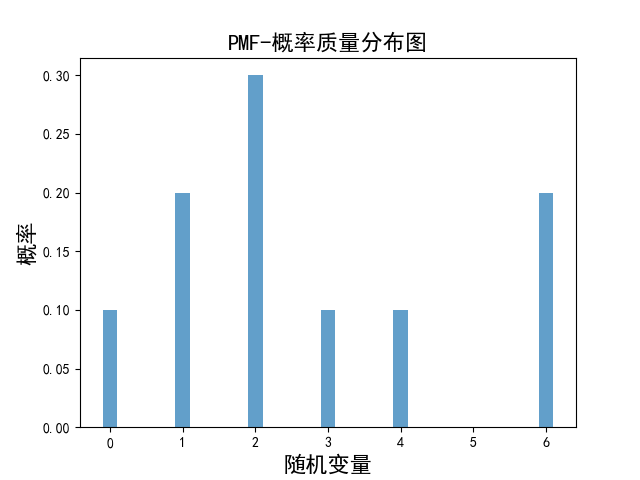

<BarContainer object of 7 artists>

Text(0.5,1,'PMF-概率质量分布图')

Text(0.5,0,'随机变量')

Text(0,0.5,'概率')

In [7]:
xk=np.arange(7)
pk=[.1,.2,.3,.1,.1,.0,.2]
custm = stats.rv_discrete(name='custm', values=(xk, pk))
fig, ax = plt.subplots(1, 1)
plt.bar(xk,custm.pmf(xk),alpha=0.7,width=.2)
plt.title('PMF-概率质量分布图',fontsize=fs)
plt.xlabel('随机变量',fontsize=fs)
plt.ylabel('概率',fontsize=fs)

# 经验分布函数

<IPython.core.display.Javascript object>


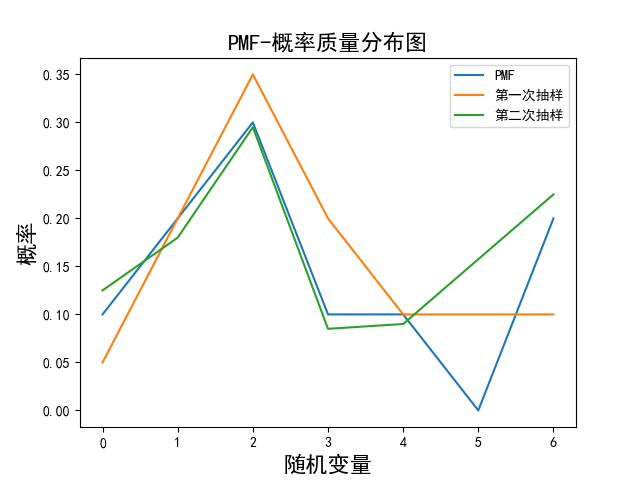

Text(0.5,1,'PMF-概率质量分布图')

Text(0.5,0,'随机变量')

Text(0,0.5,'概率')

In [8]:
xk=np.arange(7)
pk=[.1,.2,.3,.1,.1,.0,.2]
custm = stats.rv_discrete(name='custm', values=(xk, pk))
X1 = custm.rvs(size=20)  # 第一次抽样
X2 = custm.rvs(size=200)  # 第二次抽样
val1, cnt1 = np.unique(X1, return_counts=True)
val2, cnt2 = np.unique(X2, return_counts=True)
pmf_X1 = cnt1 / len(X1)
pmf_X2 = cnt2 / len(X2)
fig, ax = plt.subplots(1, 1)
plt.plot(xk,custm.pmf(xk),label='PMF')
plt.plot(val1,pmf_X1,label='第一次抽样')
plt.plot(val2,pmf_X2,label='第二次抽样')
plt.title('PMF-概率质量分布图',fontsize=fs)
plt.xlabel('随机变量',fontsize=fs)
plt.ylabel('概率',fontsize=fs)
plt.legend()

# 均匀分布

<IPython.core.display.Javascript object>


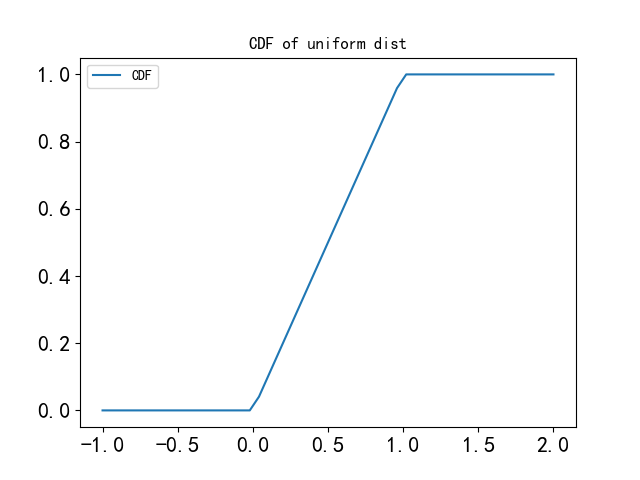

In [9]:
x=np.linspace(-1,2)
df=pd.DataFrame(data=stats.uniform.cdf(x),index=x,columns=['CDF'])
df.plot(title='CDF of uniform dist',legend=True,fontsize=fs)

<IPython.core.display.Javascript object>


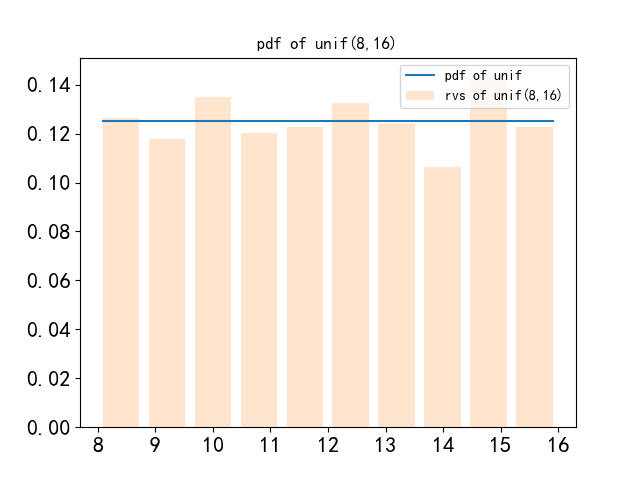

(array([0.12635498, 0.11759771, 0.13511226, 0.12009979, 0.12260186,
        0.13261018, 0.1238529 , 0.10633835, 0.14386954, 0.12260186]),
 array([ 8.00142889,  8.80076421,  9.60009952, 10.39943483, 11.19877015,
        11.99810546, 12.79744078, 13.59677609, 14.39611141, 15.19544672,
        15.99478203]),
 <a list of 10 Patch objects>)

In [10]:
# 均匀分布，在实际的定义中有两个参数，分布定义域去加你的起点和终点【a,b】
a,b=8,16
unif=stats.uniform(loc=a,scale=b-a)# loc:该分布的起点，scale：区间的长度，相当于b-a
u_rvs=np.linspace(unif.ppf(.01),unif.ppf(.99),100)
u_pdf=unif.pdf(u_rvs)
df=pd.DataFrame(data=u_pdf,index=u_rvs,columns=['pdf of unif'])
df.plot(fontsize=fs,title='pdf of unif({},{})'.format(a,b))
r=unif.rvs(1000)
plt.hist(r,histtype='bar',density=True,alpha=.2,rwidth=.8,label='rvs of unif({},{})'.format(a,b))
plt.legend(loc='best')

# 指数分布

<IPython.core.display.Javascript object>


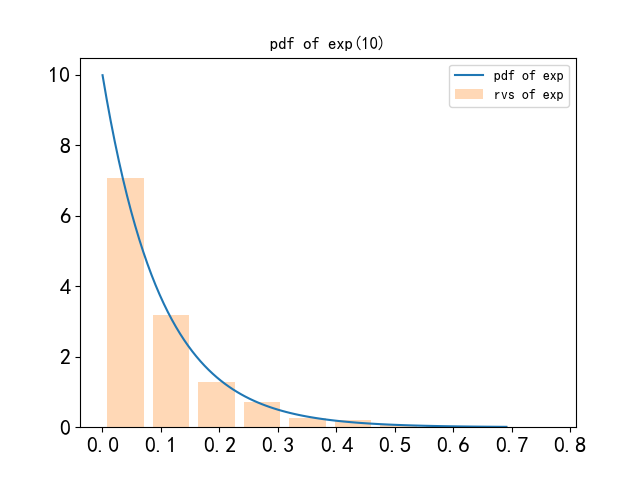

(array([7.06192794, 3.17144764, 1.29682677, 0.70619279, 0.26963725,
        0.19259803, 0.06419934, 0.02567974, 0.03851961, 0.01283987]),
 array([3.22743853e-04, 7.82051585e-02, 1.56087573e-01, 2.33969988e-01,
        3.11852403e-01, 3.89734817e-01, 4.67617232e-01, 5.45499647e-01,
        6.23382061e-01, 7.01264476e-01, 7.79146891e-01]),
 <a list of 10 Patch objects>)

In [11]:
loc,la=0,10
exp=stats.expon(loc=loc,scale=1/la)
# 指数分布，按照定义只有一个参数lambda，这里的scale = 1/lambda
# loc: 定义域的左端点，相当于将整体分布沿x轴平移loc
# scale: lambda的倒数，loc + scale表示该分布的均值，scale^2表示该分布的方差
exp_rvs=np.linspace(exp.ppf(.001),exp.ppf(.999),num=100)
exp_pdf=exp.pdf(exp_rvs)
df=pd.DataFrame(data=exp_pdf,index=exp_rvs,columns=['pdf of exp'])
df.plot(fontsize=fs,title='pdf of exp({})'.format(la))
r=exp.rvs(size=1000)
plt.hist(r,histtype='bar',density=True,alpha=.3,rwidth=.8,label='rvs of exp')
plt.legend()

<IPython.core.display.Javascript object>


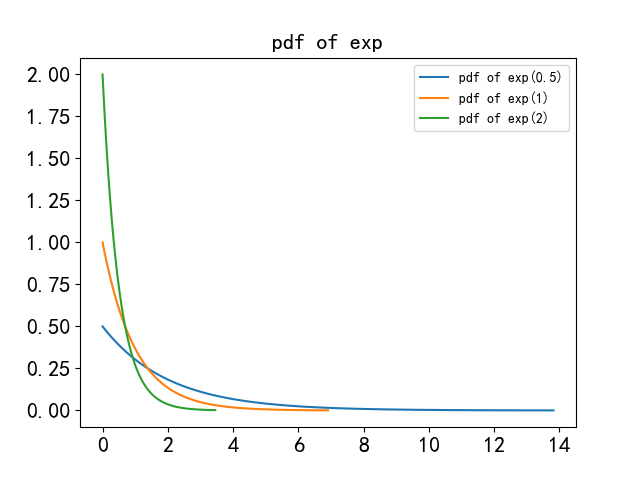

<IPython.core.display.Javascript object>


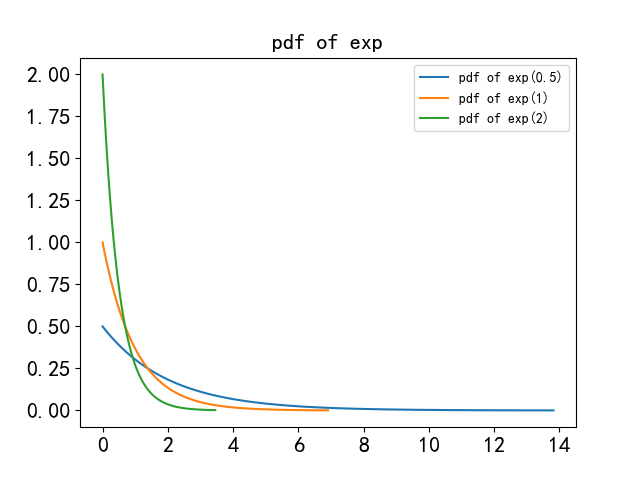

Text(0.5,1,'pdf of exp')

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 10 Text xticklabel objects>)

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]), <a list of 11 Text yticklabel objects>)

In [12]:
plt.figure()
loc=0
las=[.5,1,2]
for la in las:
    exp=stats.expon(loc=loc,scale=1/la)
    exp_rvs=np.linspace(exp.ppf(.001),exp.ppf(.999),num=100)
    exp_pdf=exp.pdf(exp_rvs)
    plt.plot(exp_rvs,exp_pdf,label='pdf of exp({})'.format(la))
plt.title('pdf of exp',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend()

# 正态分布

<IPython.core.display.Javascript object>


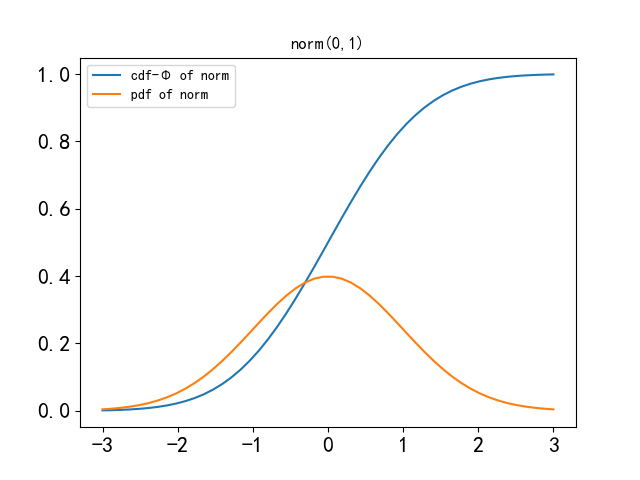

In [13]:
mu,sigma=0,1
norm_rvs=np.linspace(-3,3)
norm_cdf=stats.norm.cdf(x=norm_rvs,loc=mu,scale=sigma)
norm_pdf=stats.norm.pdf(x=norm_rvs,loc=mu,scale=sigma)
pf=pd.DataFrame(data=np.array([norm_cdf,norm_pdf]).T,index=norm_rvs,columns=['cdf-Φ of norm','pdf of norm'])
pf.plot(fontsize=fs,title='norm({},{})'.format(mu,sigma))

<IPython.core.display.Javascript object>


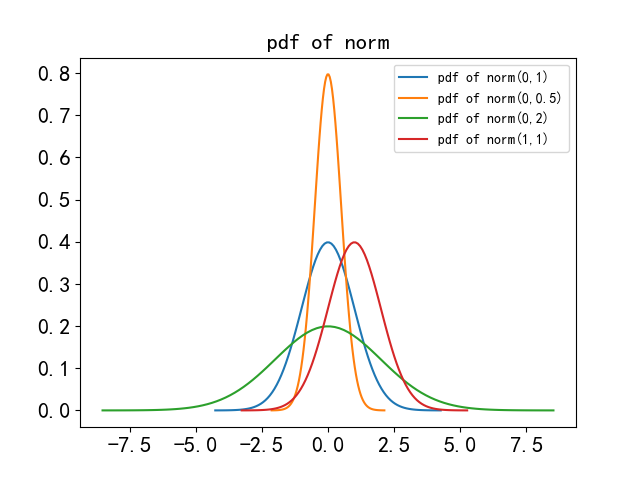

<IPython.core.display.Javascript object>


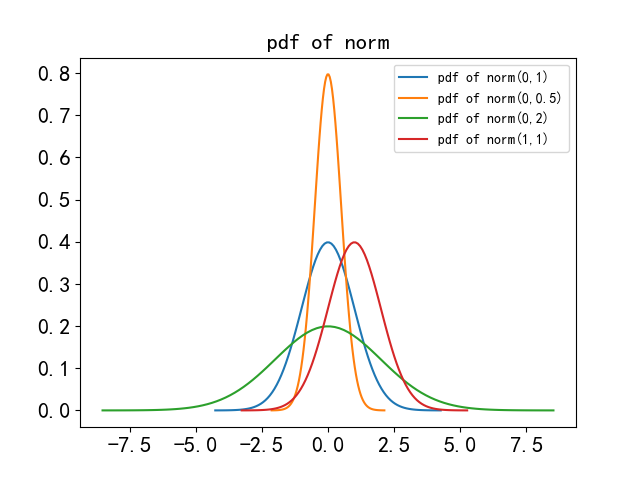

Text(0.5,1,'pdf of norm')

(array([-10. ,  -7.5,  -5. ,  -2.5,   0. ,   2.5,   5. ,   7.5,  10. ]),
 <a list of 9 Text xticklabel objects>)

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]),
 <a list of 11 Text yticklabel objects>)

In [14]:
plt.figure()
norms=[
    (0,1),
    (0,.5),
    (0,2),
    (1,1)
]
for la in norms:
    norm=stats.norm(loc=la[0],scale=la[1])
    norm_rvs=np.linspace(norm.ppf(1e-5),norm.ppf(.99999),num=100)
    norm_pdf=norm.pdf(norm_rvs)
    plt.plot(norm_rvs,norm_pdf,label='pdf of norm({},{})'.format(*la))
plt.title('pdf of norm',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend()

# 样本均值的计算

In [15]:
x=np.random.randint(low=1,high=100,size=19)
x# 样本
x.mean()
stats.gmean(x)

array([ 5, 43, 75,  6, 34, 95, 66,  9, 96, 98, 31, 69, 31, 45, 87, 30, 55,
       93, 59])

54.05263157894737

40.85302610322339

# 样本方差的计算

In [16]:
# 样本
x=np.random.randint(low=0,high=100,size=10)
x
# 计算方差
# 直接使用样本二阶中心距计算方差，分母为n
np.var(x)# 默认，ddof=0
# 使用总体方差的无偏估计计算方差，分母为n-1
np.var(x,ddof=1)# 使用ddof设置自由度的偏移量
# 计算标准差
np.std(x,ddof=0) # 使用ddof设置自由度的偏移量
np.std(x,ddof=1)

array([10, 18, 40, 79, 36, 99, 80, 39,  4,  5])

1051.4

1168.2222222222222

32.42529876500755

34.179265969622904

# 样本均值的期望和方差

In [17]:
def mean_and_std_of_sample_mean(ss=[], group_n=100):
    """
    不同大小样本均值的均值以及标准差
    """
    norm_dis = stats.norm(0, 2)  # 定义一个均值为0，标准差为2的正态分布
    for n in ss:
        sample_mean = []  # 收集每次取样的样本均值
        for i in range(group_n):
            sample = norm_dis.rvs(n)  # 取样本量为n的样本
            sample_mean.append(np.mean(sample))  # 计算该组样本的均值
        print(np.std(sample_mean), np.mean(sample_mean))

sample_size = [1, 4, 9, 16, 100]  # 每组试验的样本量
group_num = 10000
mean_and_std_of_sample_mean(ss=sample_size, group_n=group_num)

1.9815042513472567 0.014154695564134437
1.0044257879446346 -0.012103042696247884
0.6699711173771195 0.0021231920363343703
0.5053800547291836 -0.002202868606281557
0.19922337964731607 0.0027440739406095135


# 大数定理
模拟投掷硬币

In [ ]:
import random
nums=2**np.arange(4,16+1)
radios=[]
for n in nums:
    numheads=0
    for i in range(n):
        if random.random()>.5:
            numheads+=1
    radios.append(numheads/(n-numheads))
plt.figure()
plt.title("正反面的比率")
plt.xlabel('单次实验抽样次数')
plt.ylabel('比率')
plt.plot(nums,radios)
plt.hlines(1,0,nums[-1],linestyles=':',colors='r')
plt.show()

# N重伯努利分布-二项分布

<IPython.core.display.Javascript object>


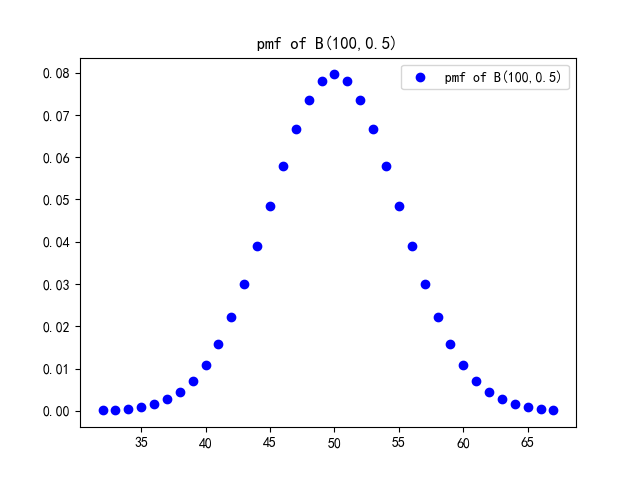

In [7]:
n,p=100,.5
b=stats.binom(n,p)
b_rvs=np.arange(b.ppf(.0001),b.ppf(.9999))
plt.figure()
plt.plot(b_rvs,b.pmf(b_rvs),'bo',label='pmf of B({},{})'.format(n,p))
plt.title('pmf of B({},{})'.format(n,p))
plt.legend()

# N重伯努利分布-近似正态分布

<IPython.core.display.Javascript object>


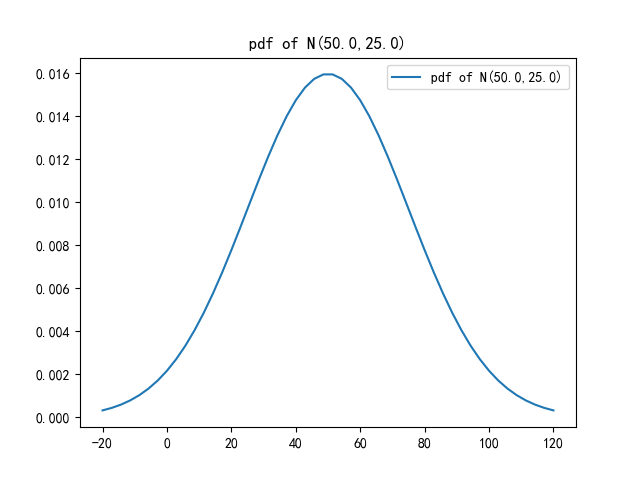

In [11]:
mu,sigma=100*.5,(100*.5*(1-.5))
norm=stats.norm(loc=mu,scale=sigma)
norm_rvs=np.linspace(-20,120)
plt.figure()
plt.plot(norm_rvs,norm.pdf(norm_rvs),label='pdf of N({},{})'.format(mu,sigma))
plt.title('pdf of N({},{})'.format(mu,sigma))
plt.legend()

# 模拟服从各分布的随机变量和

<IPython.core.display.Javascript object>


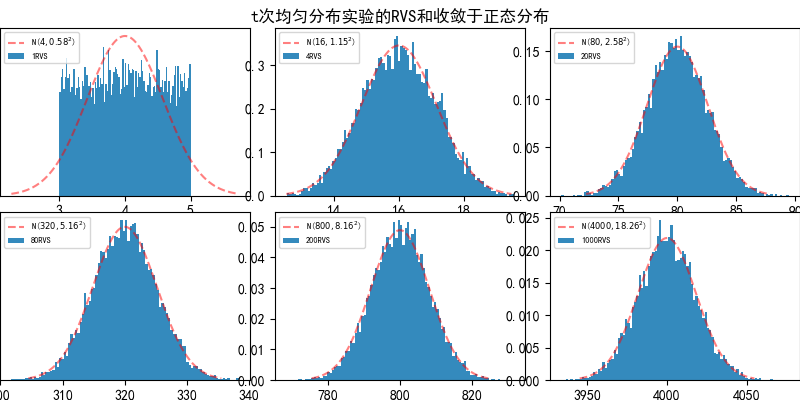

In [13]:
# 定义分布类型
drv,crv=0,1# 离散型分布，连续型分布
# 绘制连续型随机变量和的分布
def  sampling2pdf(plt,n,dist,t=10000):
    """
    :param plt: 为绘制对象
    :param n: 单次实验的抽样次数
    :param dist:独立同分布的分布对象
    :param t:独立同分布的实验次数
    """
    sum_of_samples=np.zeros(t)
    for i in range(t):
        samples=dist.rvs(size=n)# 抽样次数
        sum_of_samples[i]=np.sum(samples)
    plt.hist(sum_of_samples,density=True,bins=100,label='{}RVS'.format(n),color='#348ABD')
# 绘制离散型随机变量和的分布
def sampling2pmf(plt,n,dist,t=10000):
    sum_of_samples=np.zeros(t)
    for i in range(t):
        samples=dist.rvs(size=n)
        sum_of_samples[i]=np.sum(samples)
    val,cnt=np.unique(sum_of_samples,return_counts=True) # 独立同分布的随机变量和的值以及对应的个数
    pmf=cnt/len(sum_of_samples)
    plt.vlines(val,0,pmf,linestyles='-',lw=3,color='#348ABD')
def plot(n,dist,subplot,plt,t,dist_name,dist_type):
    """
    :param dist_name: 分布名称
    :param dist_type: 分布类型
    """
    plt.subplot(subplot)
    sampling2pmf(plt=plt,n=n,dist=dist,t=t) if dist_type==drv else sampling2pdf(plt,n,dist,t)
    # 正态分布
    mu,sigma=n*dist.mean(),(n*dist.var())**.5
    norm=stats.norm(loc=mu,scale=sigma)
    norm_x=np.linspace(mu-3*sigma,mu+3*sigma,t)
    norm_pdf=norm.pdf(norm_x)
    plt.plot(norm_x,norm_pdf,'r--',alpha=.5,label='N(${0:.0f},{1:.2f}^2$)'.format(mu,sigma))
    plt.legend(loc='upper left',prop={"size":6})
size=[
(1,231),
(4,232),
(20,233),
(80,234),
(200,235),
(1000,236),
]# 抽样次数,画布位置
t=10000# 实验次数
# dist_name,dist_type='伯努利',drv
# dist=stats.bernoulli(p=.99)# 定义一个伯努利分布
# dist_name,dist_type='二项分布',drv
# dist=stats.binom(n=20,p=.4)# 定义一个二项分布
dist_name,dist_type='均匀分布',crv
dist=stats.uniform(loc=3,scale=5-3)# 定义一个均匀分布
plt.figure(figsize=(8,4))
for i in size:
    plot(n=i[0],dist=dist,subplot=i[1],plt=plt,t=t,dist_name=dist_name,dist_type=dist_type)
plt.suptitle('t次{}实验的RVS和收敛于正态分布'.format(dist_name))
plt.subplots_adjust(wspace=.1,hspace=.1,left=0,right=1,top=.93,bottom=0.05)  